In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input,Dense
from sklearn.model_selection import train_test_split


In [23]:
dataset_path="LP-IV-datasets/ECGdataset_Ass4/ecg_autoencoder_dataset.csv"
df=pd.read_csv(dataset_path)

In [24]:
scaler=StandardScaler()
X=scaler.fit_transform(df.values)
y=X

In [25]:
X_train, X_test, _,_ =train_test_split(X,X,random_state=42,test_size=0.3)

In [26]:
input_dim=X_train.shape[1]

In [27]:
encoder=Sequential([
    Input(shape=(input_dim,)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
])

decoder=Sequential([
    Input(shape=(32,)),
    Dense(16,activation='relu'),
    Dense(8, activation='relu'),
    Dense(input_dim, activation='relu'),

])


autoencoder=Sequential([
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train,X_train,epochs=100,batch_size=32,shuffle=True)

Epoch 1/100
110/110 [==============================] - 1s 1ms/step - loss: 0.9012
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7942
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7495
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7290
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7212
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7141
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7071
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7013
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 0.6944
Epoch 12/100
110/110 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 13/100


In [28]:
y_pred=autoencoder.predict(X_test)

47/47 [==============================] - 0s 1ms/step


In [29]:
mse=np.mean(np.power(y_pred-X_test,2),axis=1)

In [30]:
mse

array([0.44676662, 0.42746132, 0.30787644, ..., 0.34700078, 0.443313  ,
       0.28244133])

In [31]:
threshold=np.percentile(mse,95)

In [32]:
anamolies=mse>threshold

In [33]:
number_of_anamolies=np.sum(anamolies)

In [34]:
number_of_anamolies

75

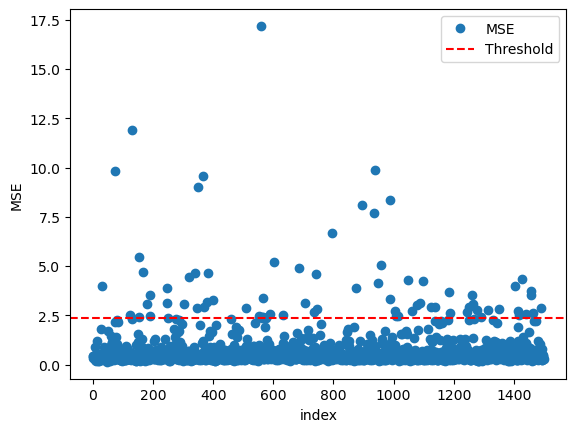

In [35]:
plt.plot(mse,marker='o',linestyle=' ',label="MSE")
plt.axhline(threshold,linestyle='--',color='r',label="Threshold")
plt.ylabel("MSE")
plt.xlabel("index")
plt.legend()

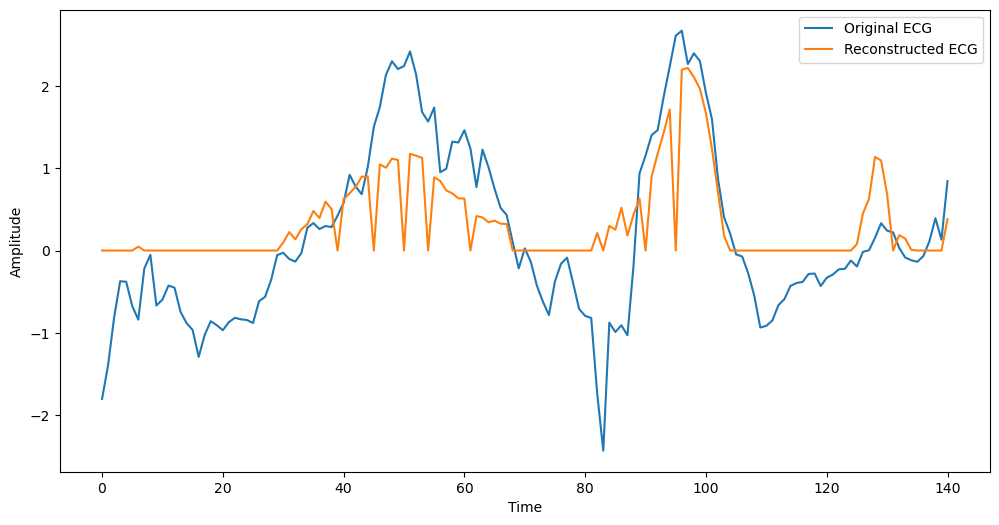

In [36]:
plt.figure(figsize=(12,6))
plt.plot(X_train[0],label="Original ECG")
plt.plot(y_pred[0],label="Reconstructed ECG")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [42]:
# Evaluate the model
y_true = np.zeros(len(X_test))
print("Confusion Matrix:")
print(confusion_matrix(anamolies, anamolies))

print("\nClassification Report:")
print(classification_report(anamolies, anamolies))

Confusion Matrix:
[[1425    0]
 [   0   75]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1425
        True       1.00      1.00      1.00        75

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



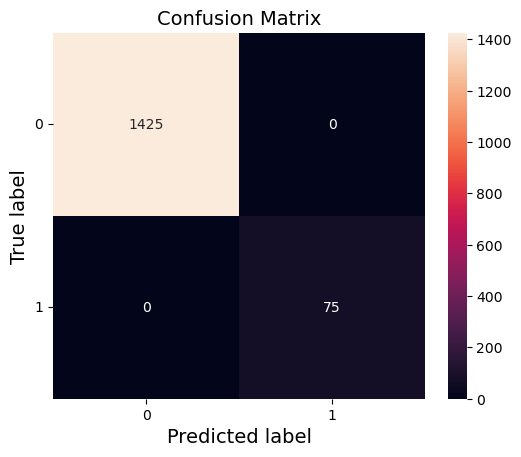

In [49]:
plt.figure(figsize = (6, 4.75))
# sns.heatmap(confusion_matrix(anamolies, anamolies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
sns.heatmap(confusion_matrix(anamolies, anamolies), annot = True,fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()